<font color='purple'>**PROJECT DESCRIPTION**</font>


The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

# Table of contents
1. [Download the data](#step1)
2. [Carry out exploratory data analysis (EDA)](#step2)
3. [Build a model to predict user churn](#step3)
4. [Create user clusters](#step4)
5. [Come up with conclusions and basic recommendations on working with customers](#step5)


## Download the data <a name="step1"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

## Carry out exploratory data analysis (EDA)<a name = 'step2'> </a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
df.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
churn = df.groupby('churn').mean().reset_index()
churn

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [9]:
import warnings
warnings.filterwarnings('ignore')

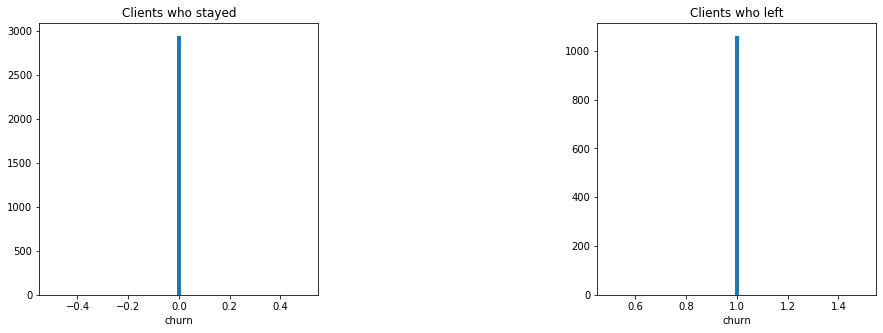

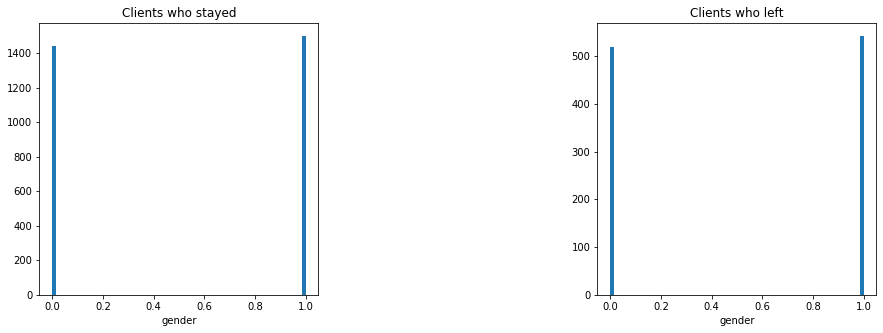

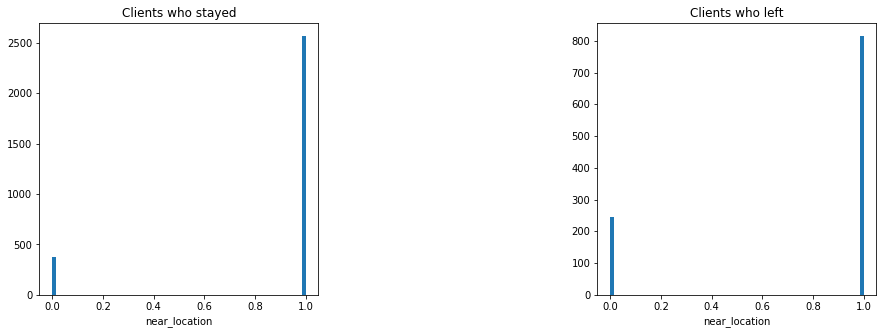

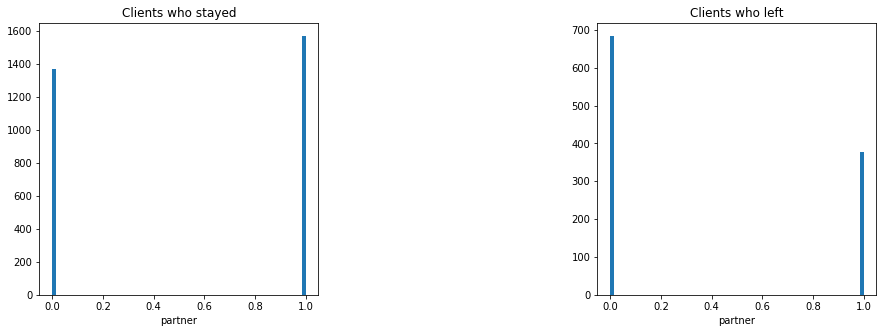

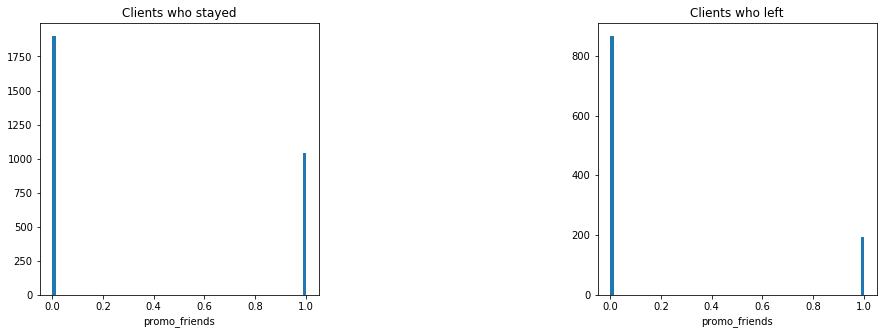

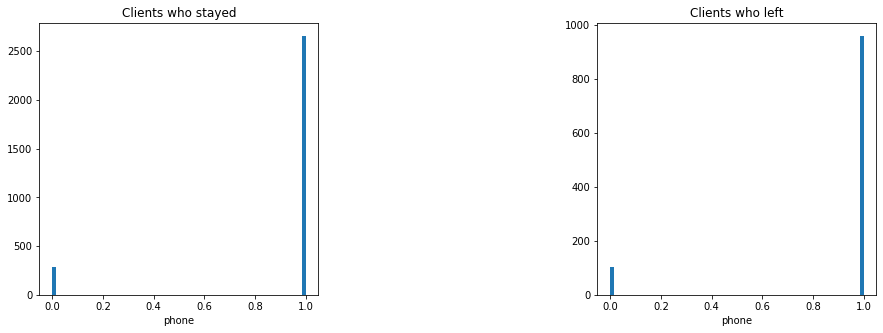

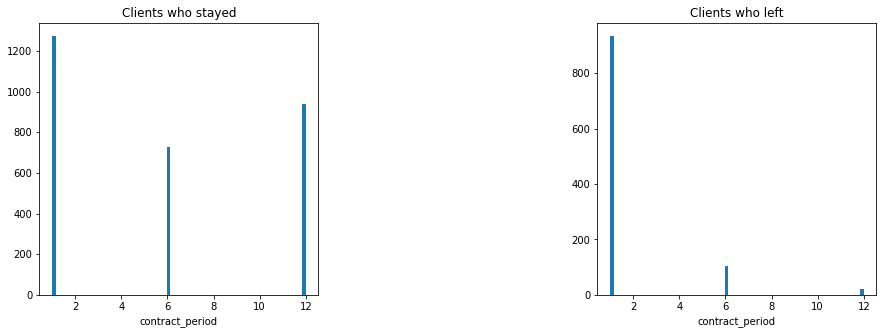

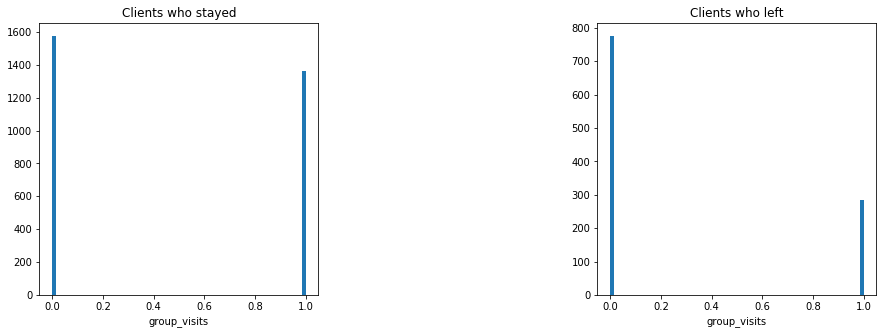

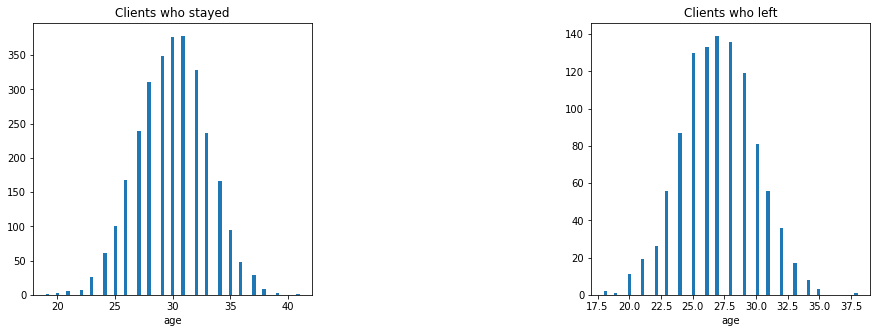

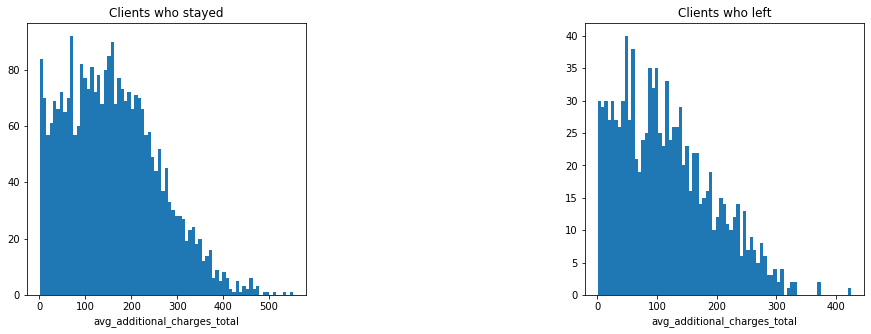

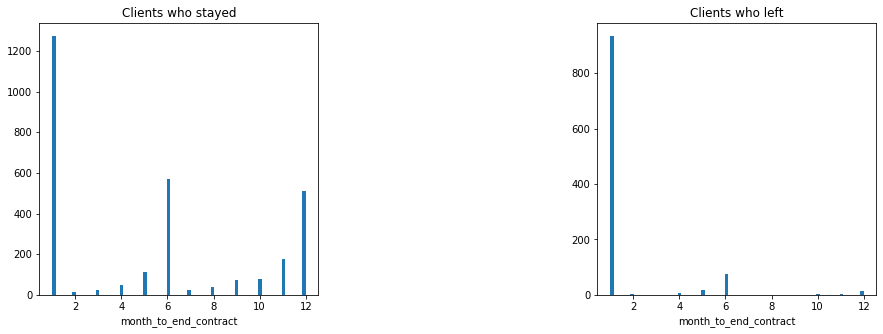

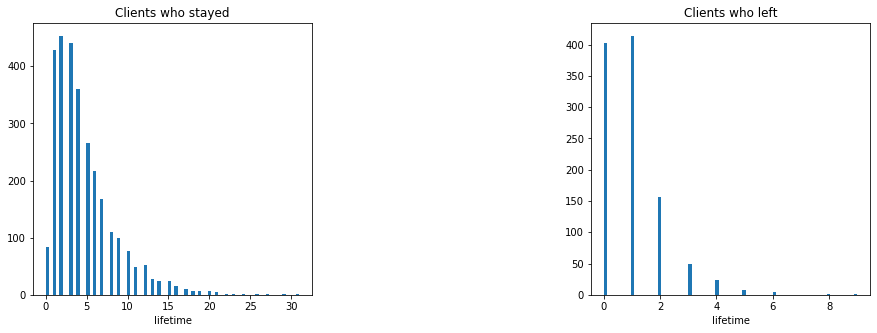

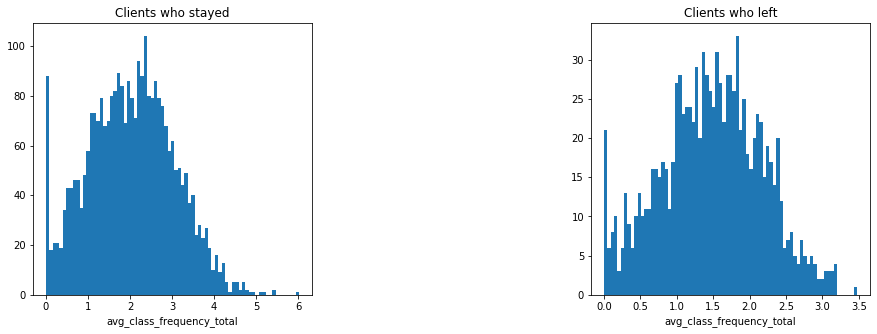

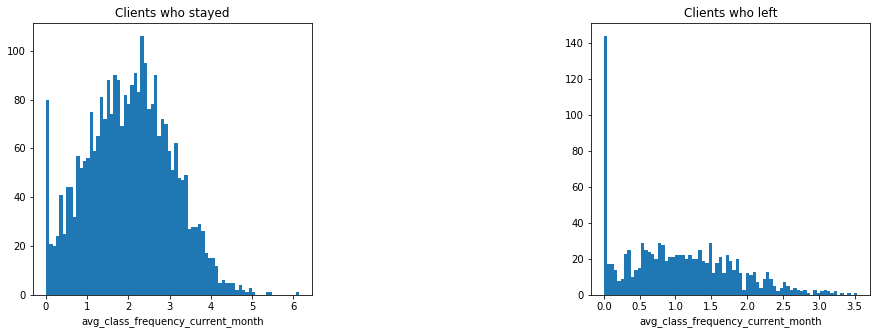

In [10]:
column_name = churn.columns.to_list()

for name in column_name:
    fig, (axs1, axs2) = plt.subplots(1,2, figsize = (15,5))
    fig.subplots_adjust(hspace = 1, wspace = 1)
    axs1.hist(df.query('churn in "0"')[name], bins = 75)
    axs1.set_title('Clients who stayed')
    axs1.set_xlabel(name)
    
    
    axs2.hist(df.query('churn in "1"')[name], bins = 75)
    axs2.set_title('Clients who left')
    axs2.set_xlabel(name)
    
    
    fig.show()

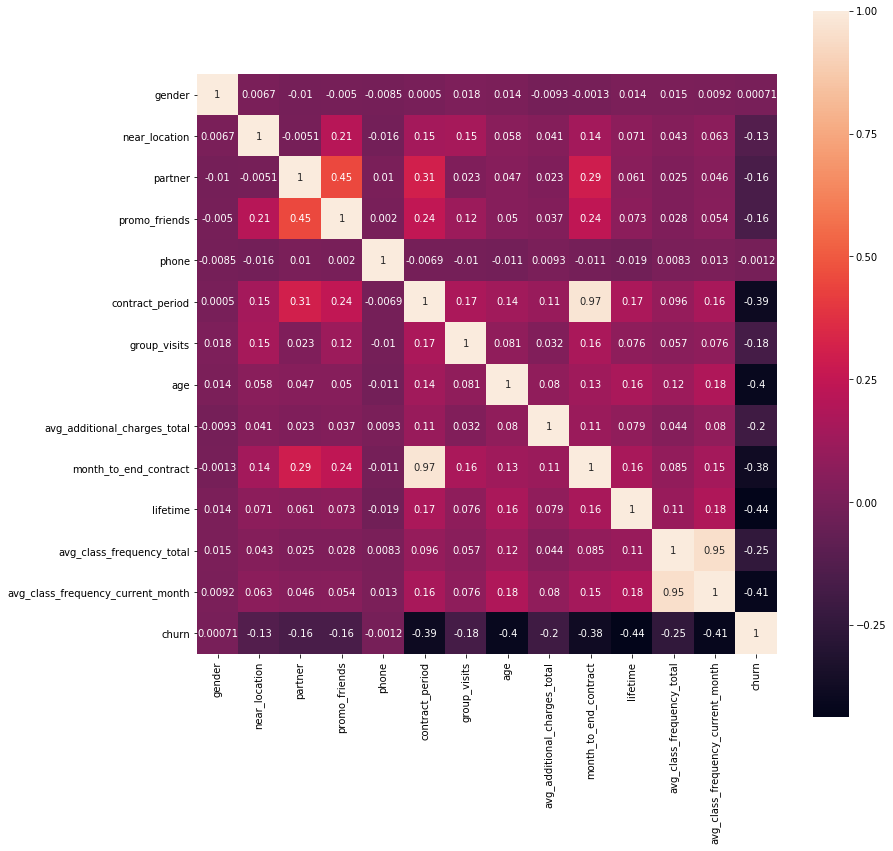

In [11]:
cm = df.corr() 
fig, ax = plt.subplots(figsize = (13,13))


sns.heatmap(cm, annot = True, square=True)
 
plt.show()

<font color = 'purple'>**We downloaded data and we can see there are no missing values, average contract period of 4.6 months and average age is 29 years and avg class_frequency is 1.8 a week, avg lifetime of the since the customer first came to the gym is 3.7 months. If we look at graphs and mean values for churned group we can see that its tending to be younger people who take short period contracts and dont go frequently to gym and group classes are not popular among them. Group who stayed shows that its a bit older people who came through partner programm or friends promo, with longer contracts and higher frequency attending gym and like group classes. Correlation matrix showed us churn dependancy with contract_period, age, lifetime and frequency. Also we can see partner with friends_promo and contract_period**</font>

## Build a model to predict user churn <a name="step3"></a>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [13]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

X = df.drop('churn', axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)


# define the algorithm for the logistic regression model
lr_model = LogisticRegression(max_iter = 1000)
# train the model
lr_model.fit(X_train_st, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# print all metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')



# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(random_state=0) # write your code here
# train the random forest model
rf_model.fit(X_train_st, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)# write your code here
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]# write your code here
# print all metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')

Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Metrics for random forest:
	Accuracy: 0.91
	Precision: 0.83
	Recall: 0.78


<font color='purple'>**We can see that all metrics for logistic regression model is better then Forest Classifier**</font>

## Create user clusters <a name="step4"></a>

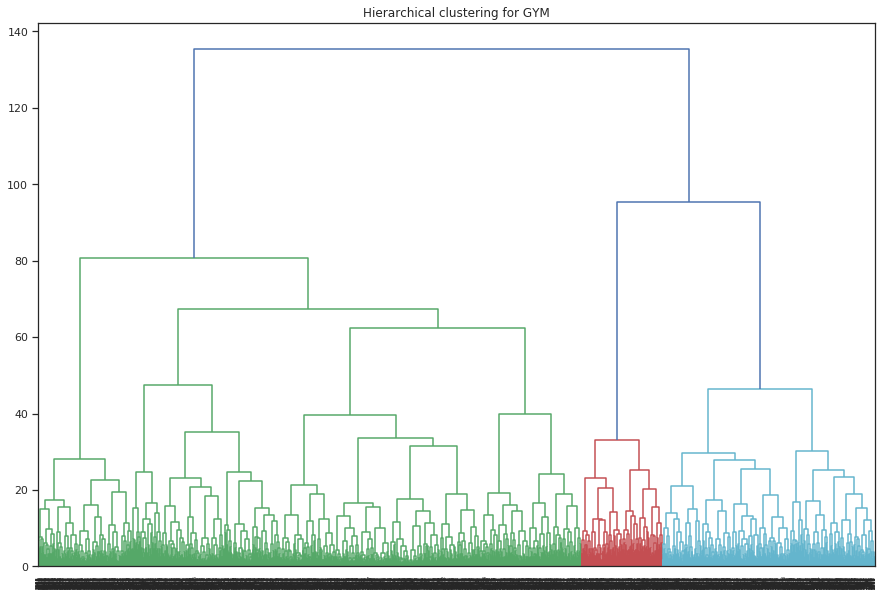

In [23]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

df1 = df.drop('churn', axis = 1)

sc = StandardScaler()
x_sc = sc.fit_transform(df1)

linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

In [15]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(X_sc)

In [16]:
df['cluster_km'] = labels

df.groupby(['cluster_km']).mean().reset_index()

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


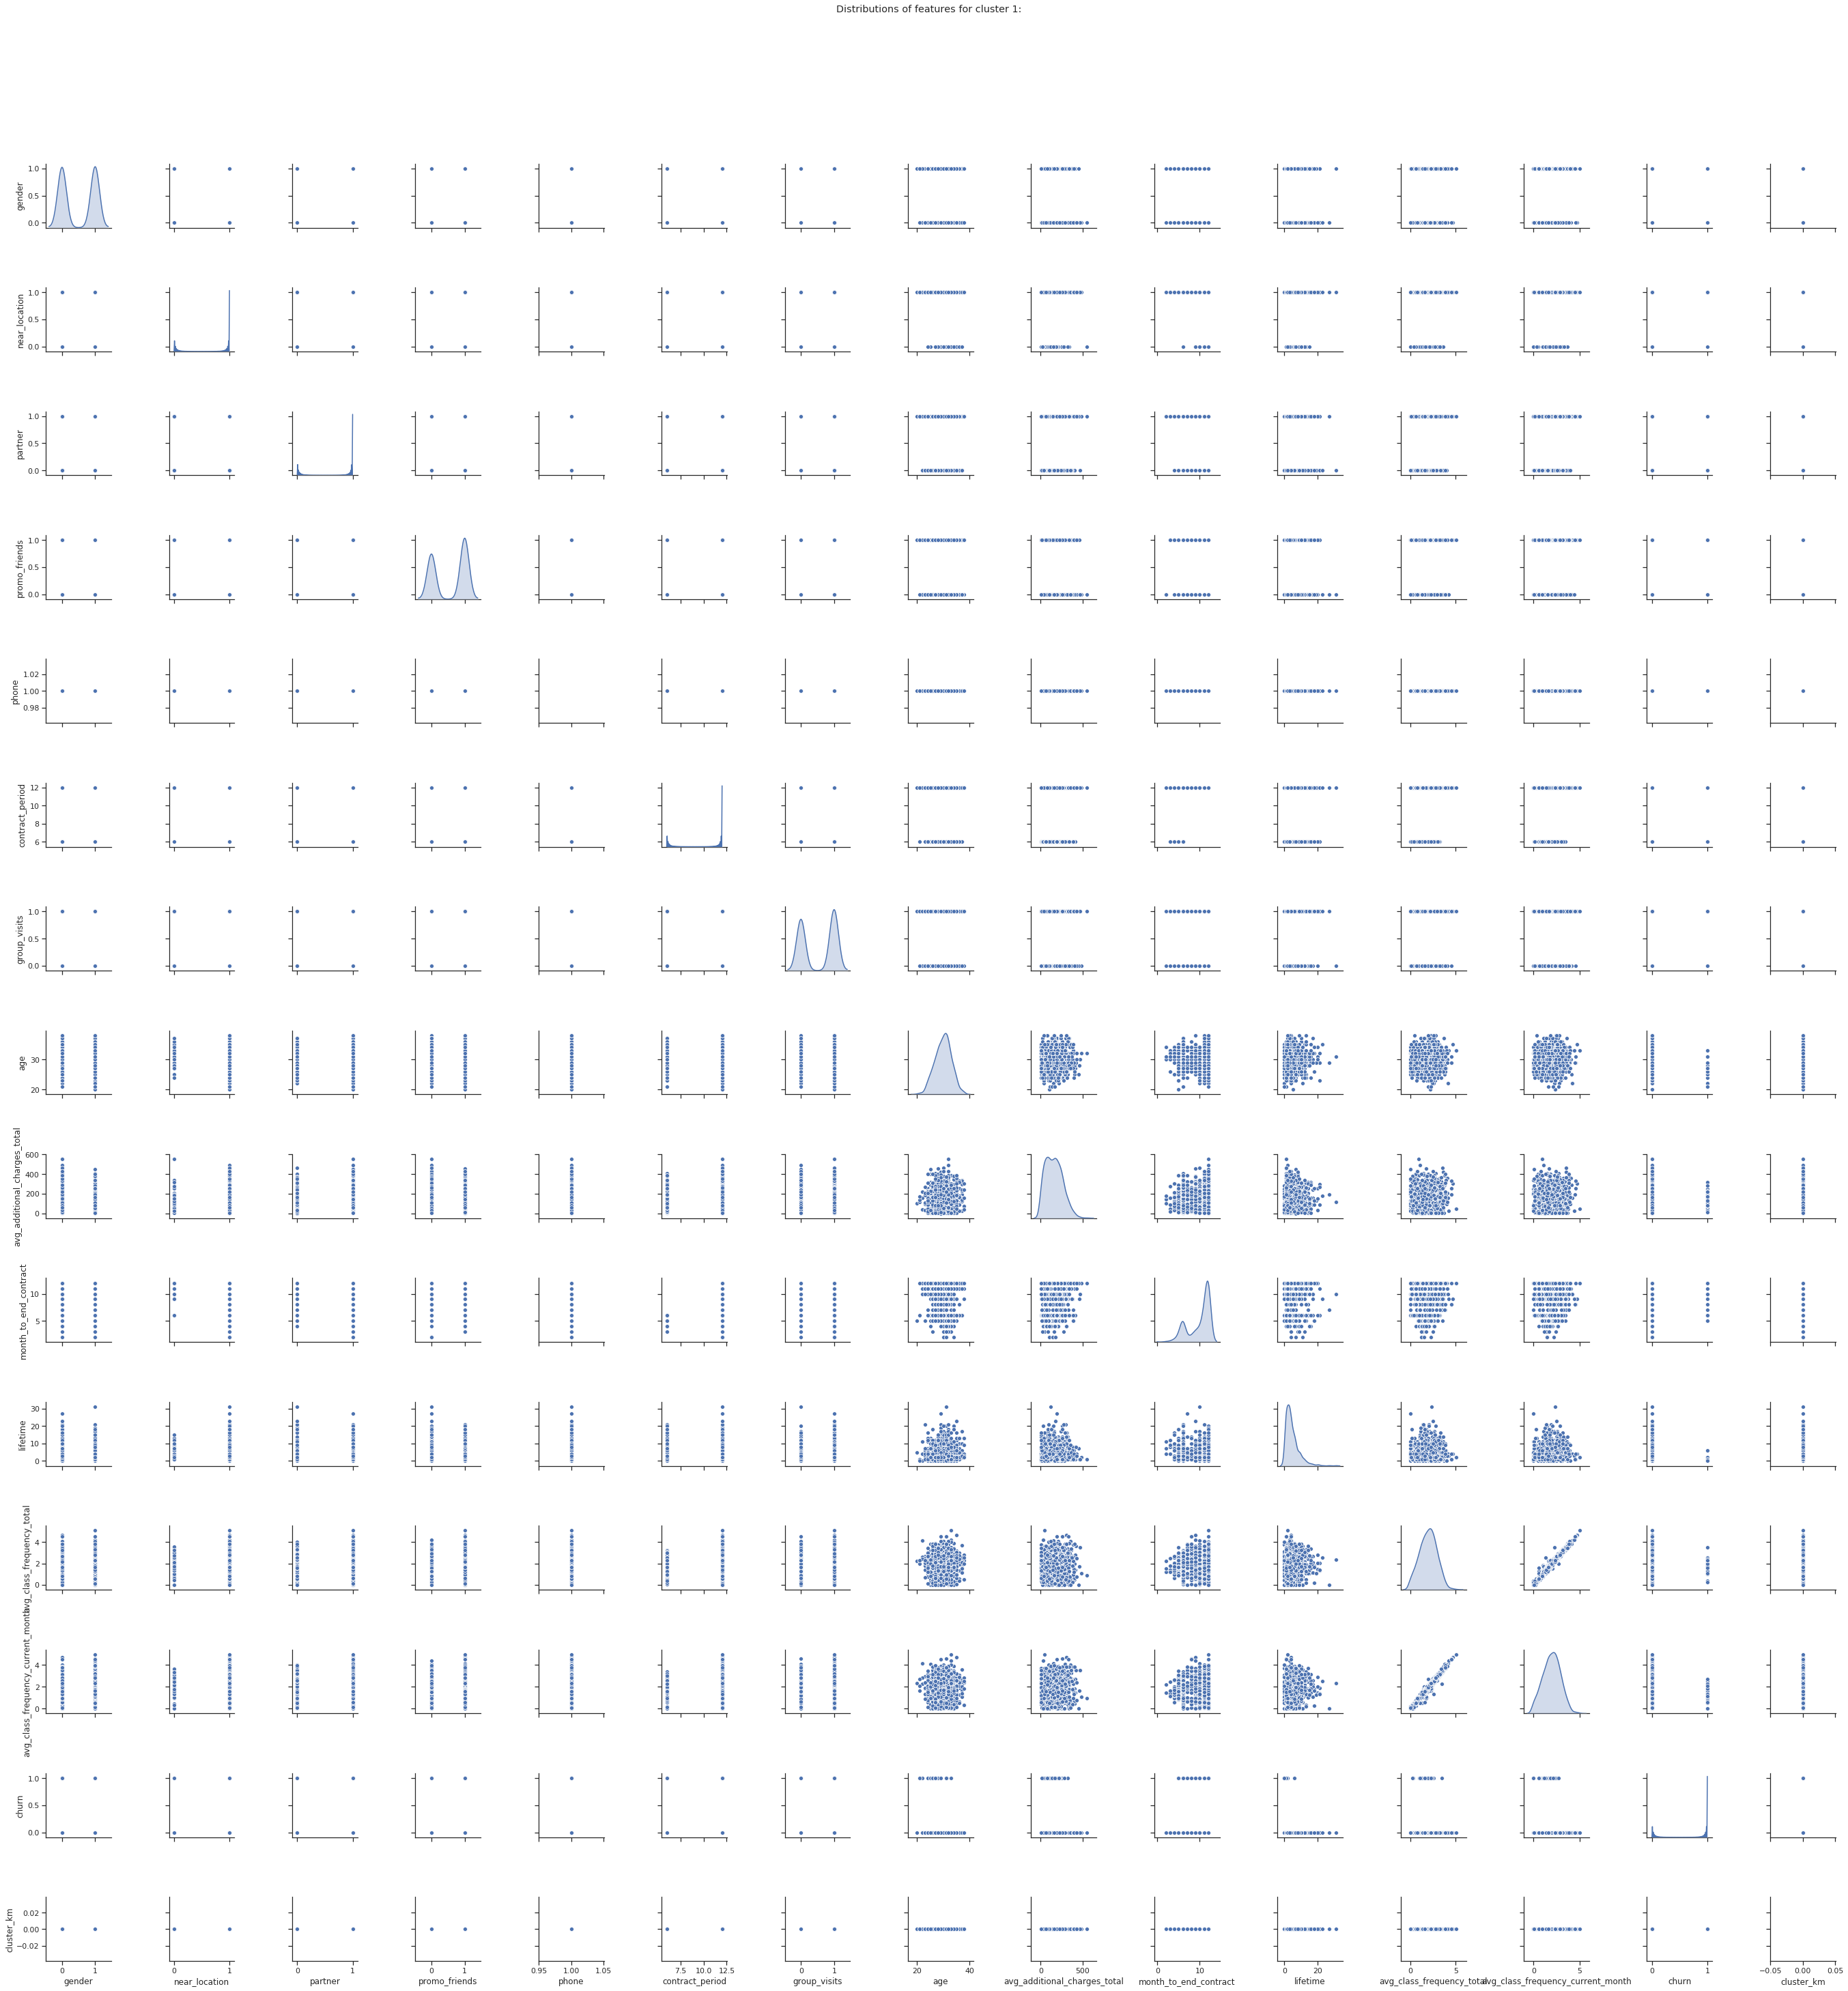

In [17]:
sns.set(style = 'ticks', color_codes = True)

g1 = sns.pairplot(df.query('cluster_km in "0"'), diag_kind = 'kde')  
g1.fig.suptitle("Distributions of features for cluster 1:", y = 1.08)

plt.show(sns)

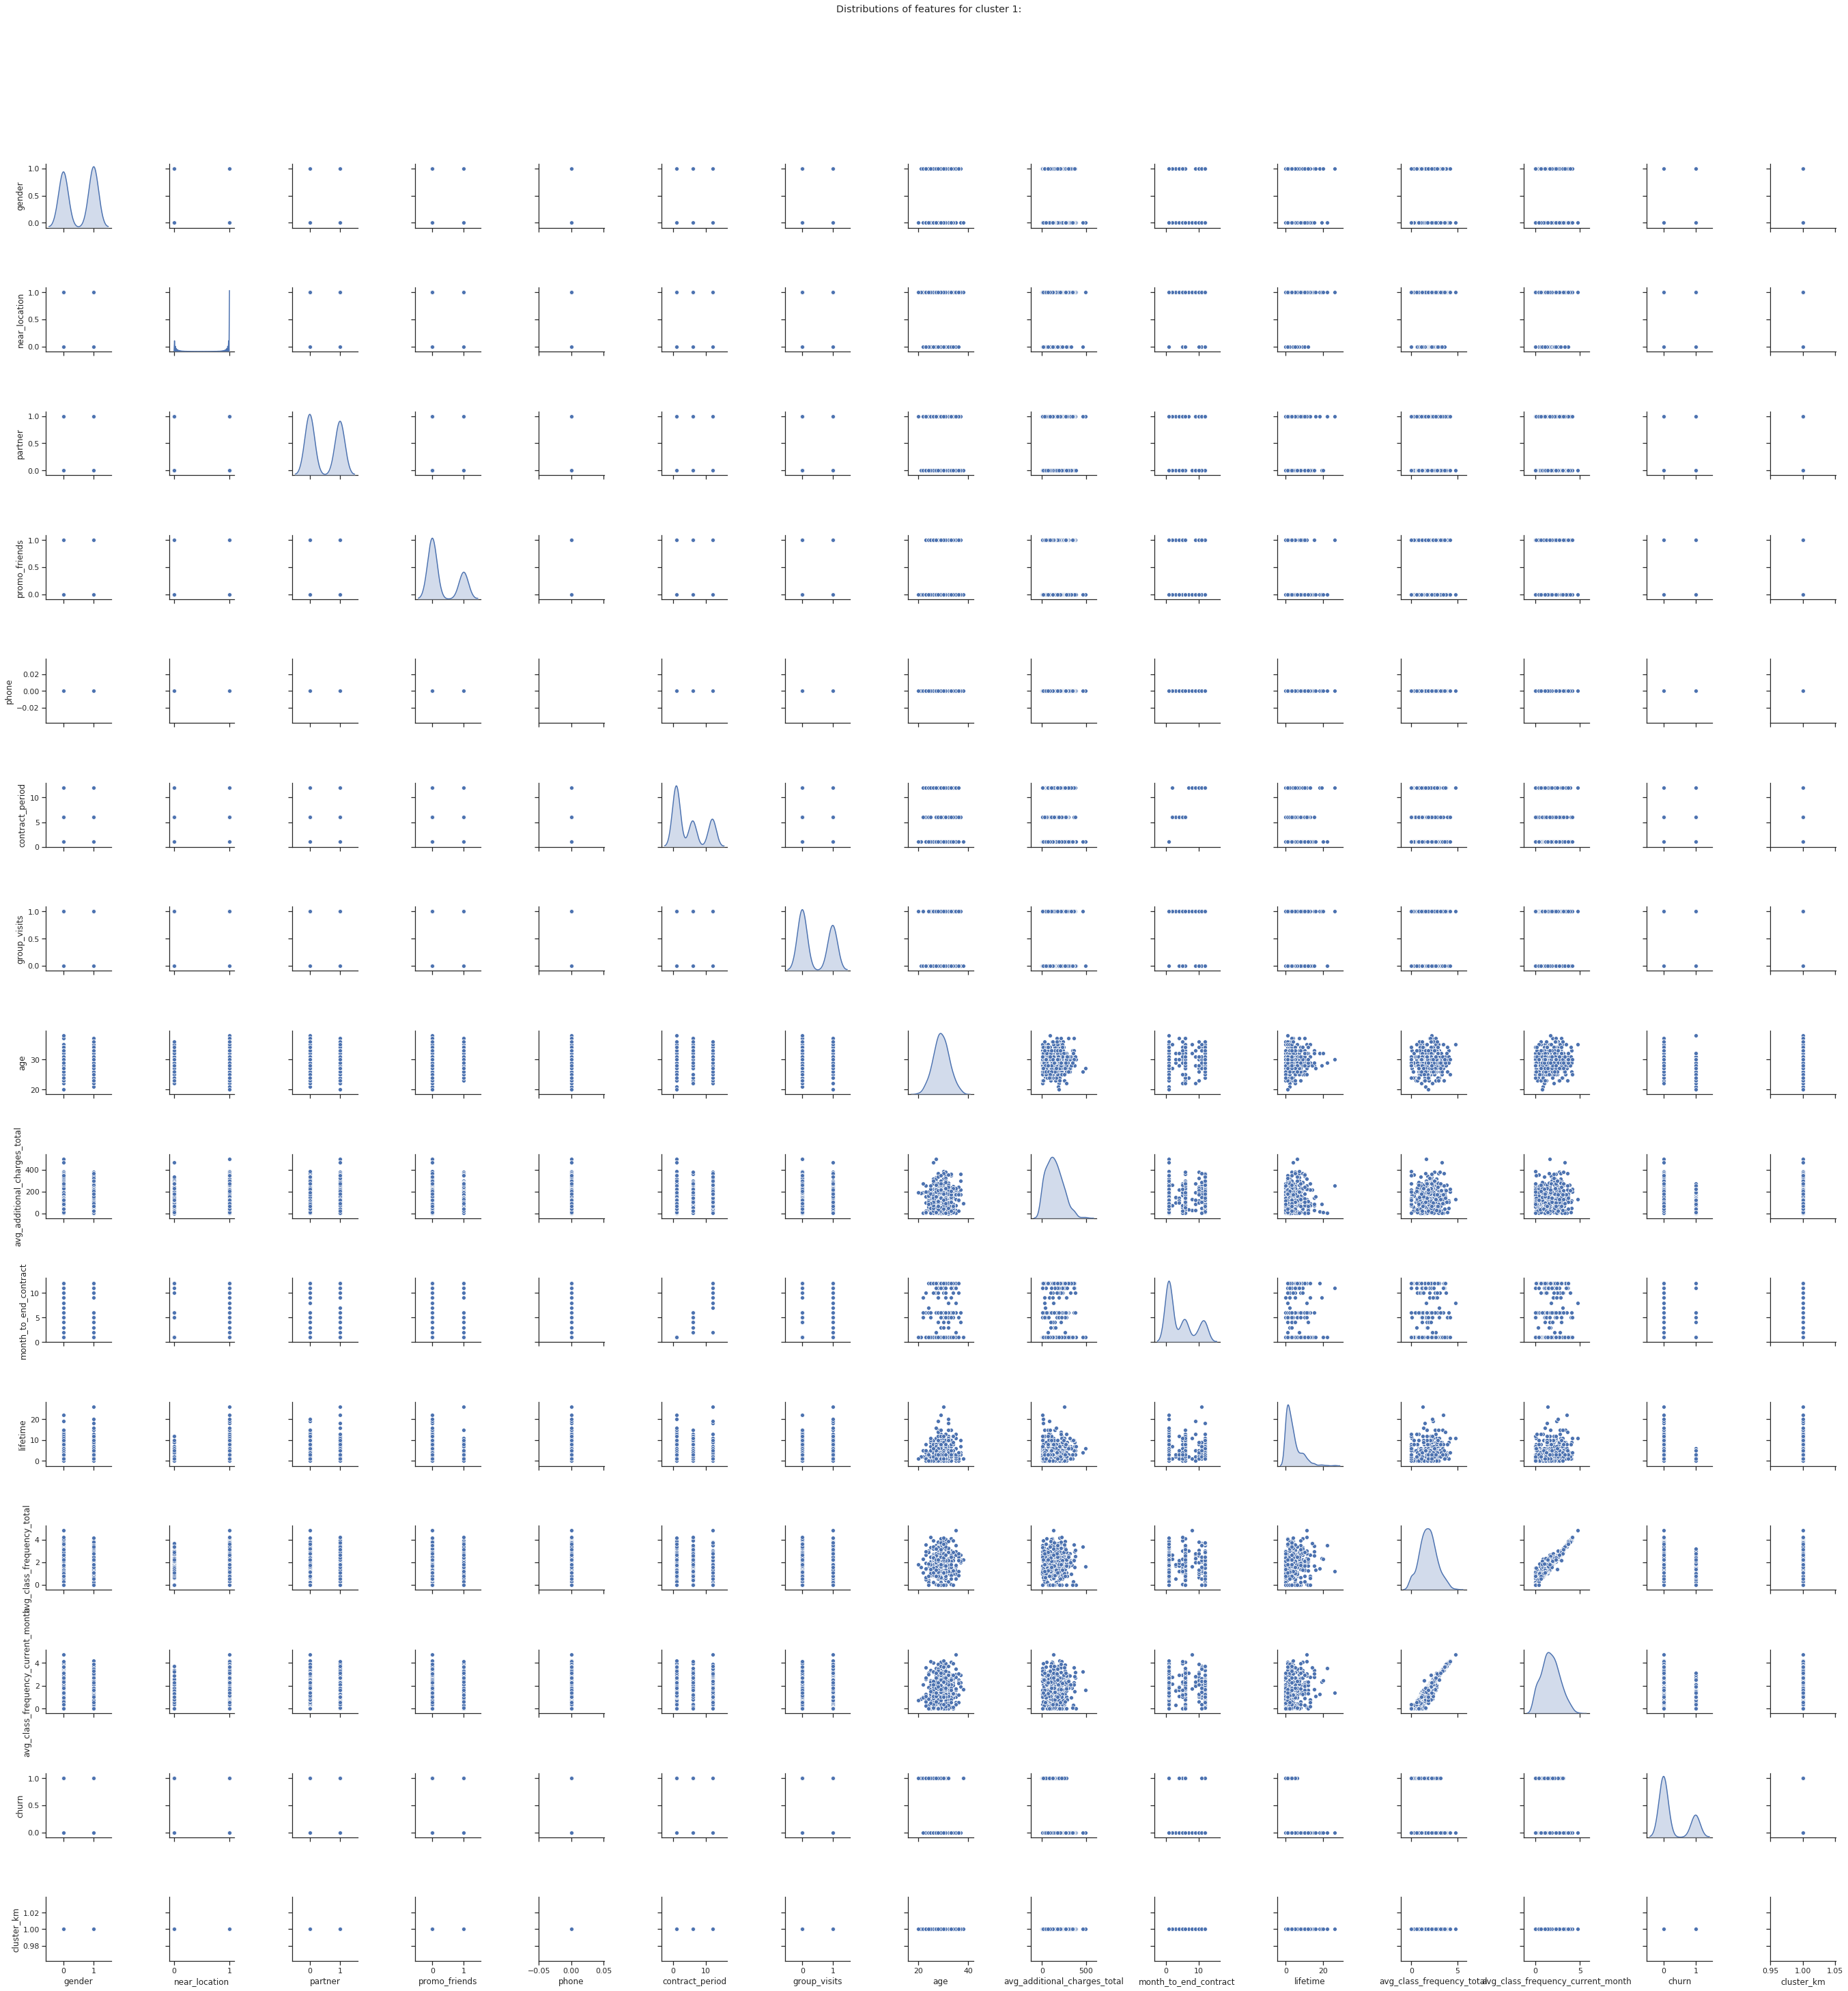

In [18]:
sns.set(style = 'ticks', color_codes = True)

g1 = sns.pairplot(df.query('cluster_km in "1"'), diag_kind = 'kde')  
g1.fig.suptitle("Distributions of features for cluster 1:", y = 1.08)

plt.show(sns)

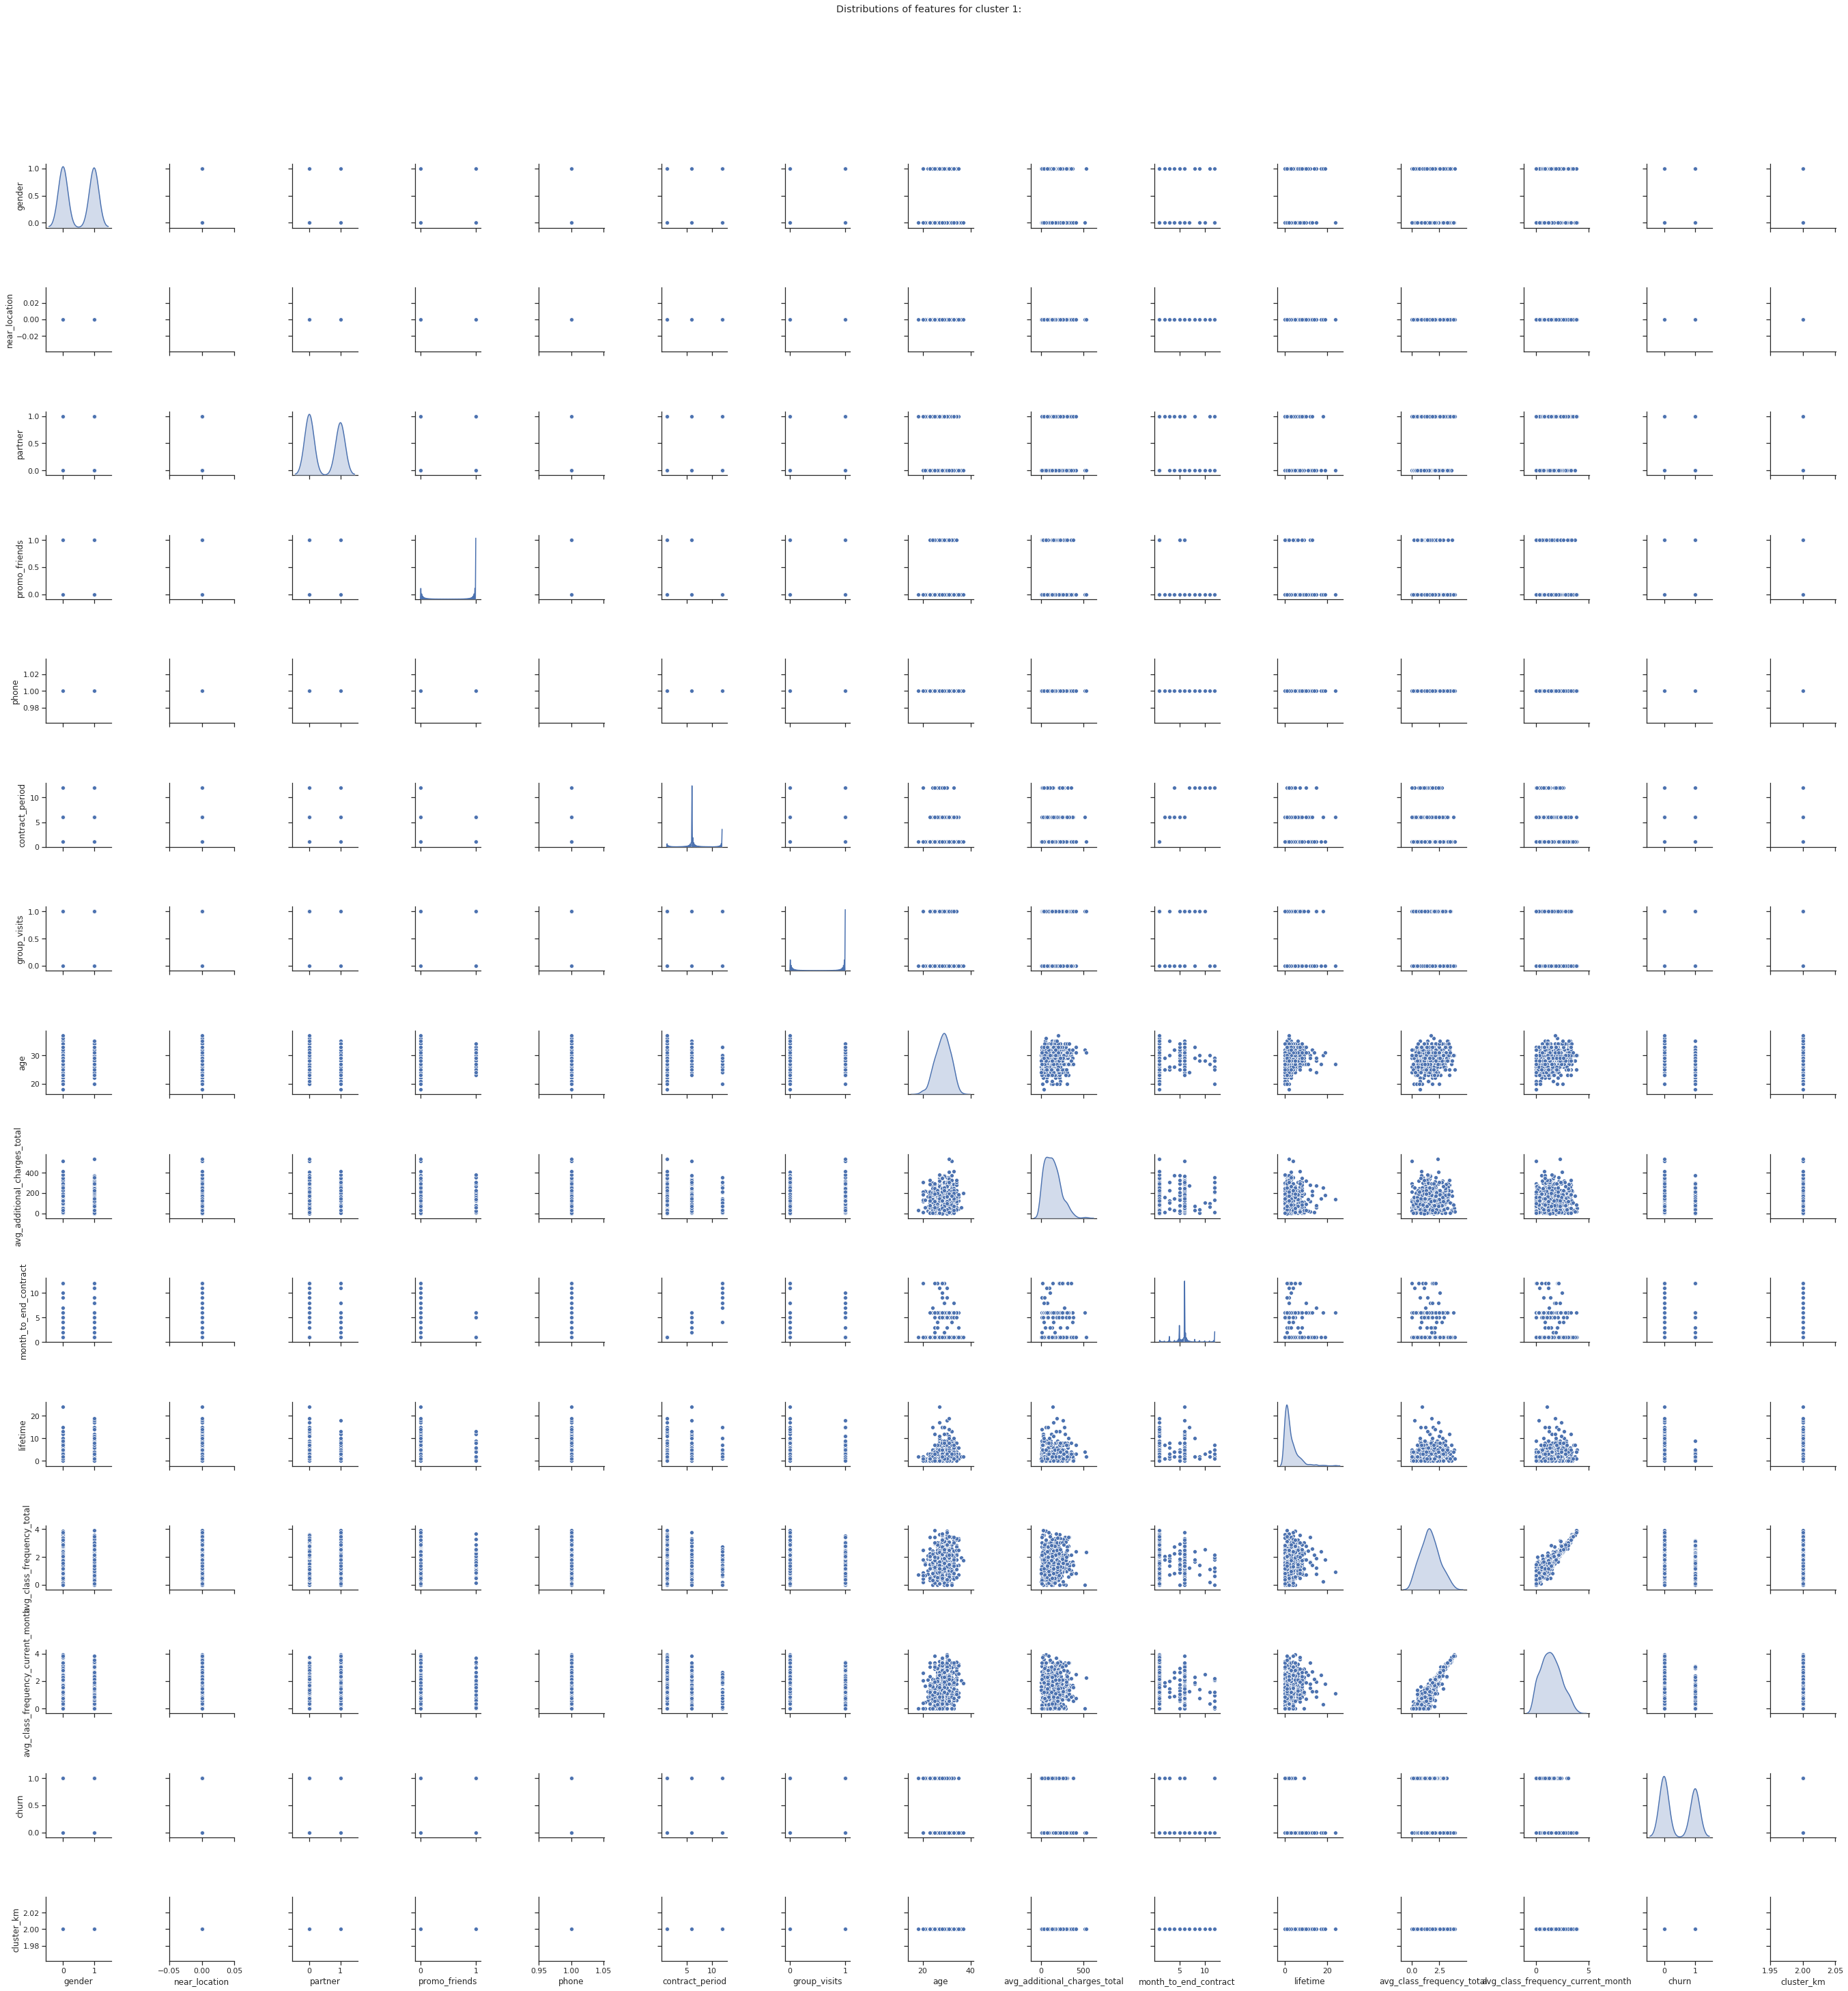

In [19]:
sns.set(style = 'ticks', color_codes = True)

g1 = sns.pairplot(df.query('cluster_km in "2"'), diag_kind = 'kde')  
g1.fig.suptitle("Distributions of features for cluster 1:", y = 1.08)

plt.show(sns)

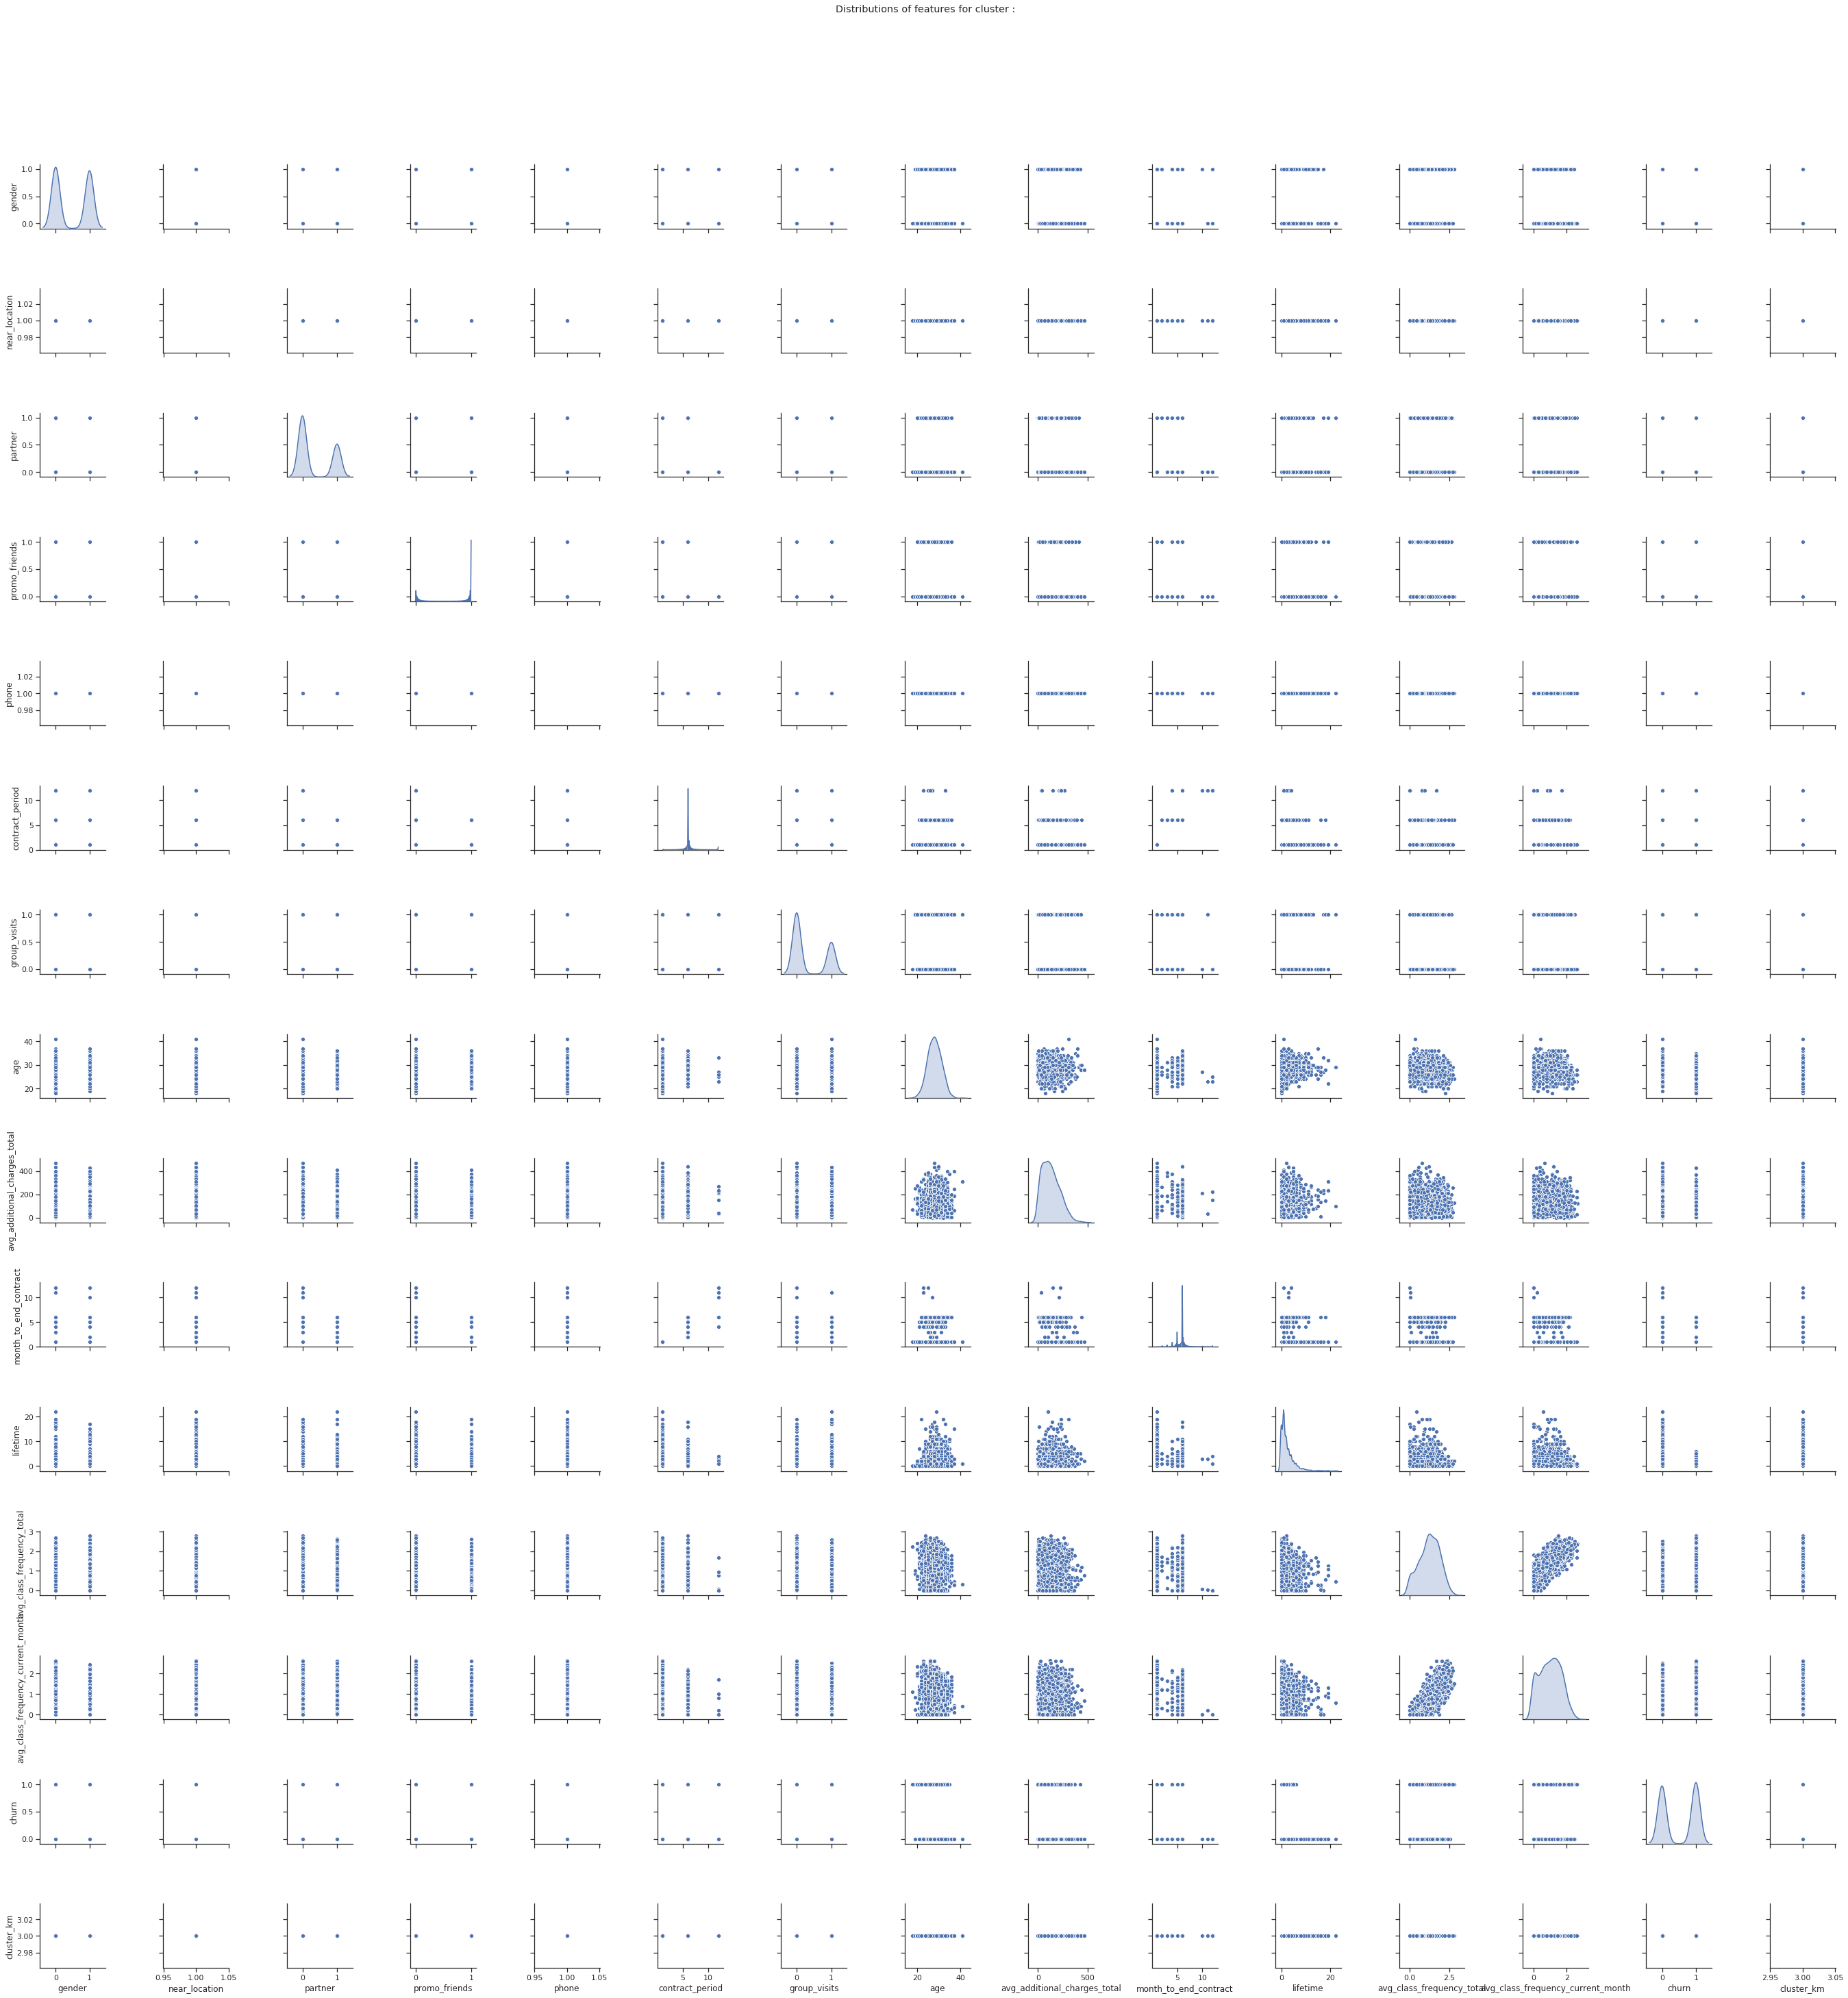

In [20]:
sns.set(style = 'ticks', color_codes = True)

g1 = sns.pairplot(df.query('cluster_km in "3"'), diag_kind = 'kde')  
g1.fig.suptitle("Distributions of features for cluster :", y = 1.08)

plt.show(sns)

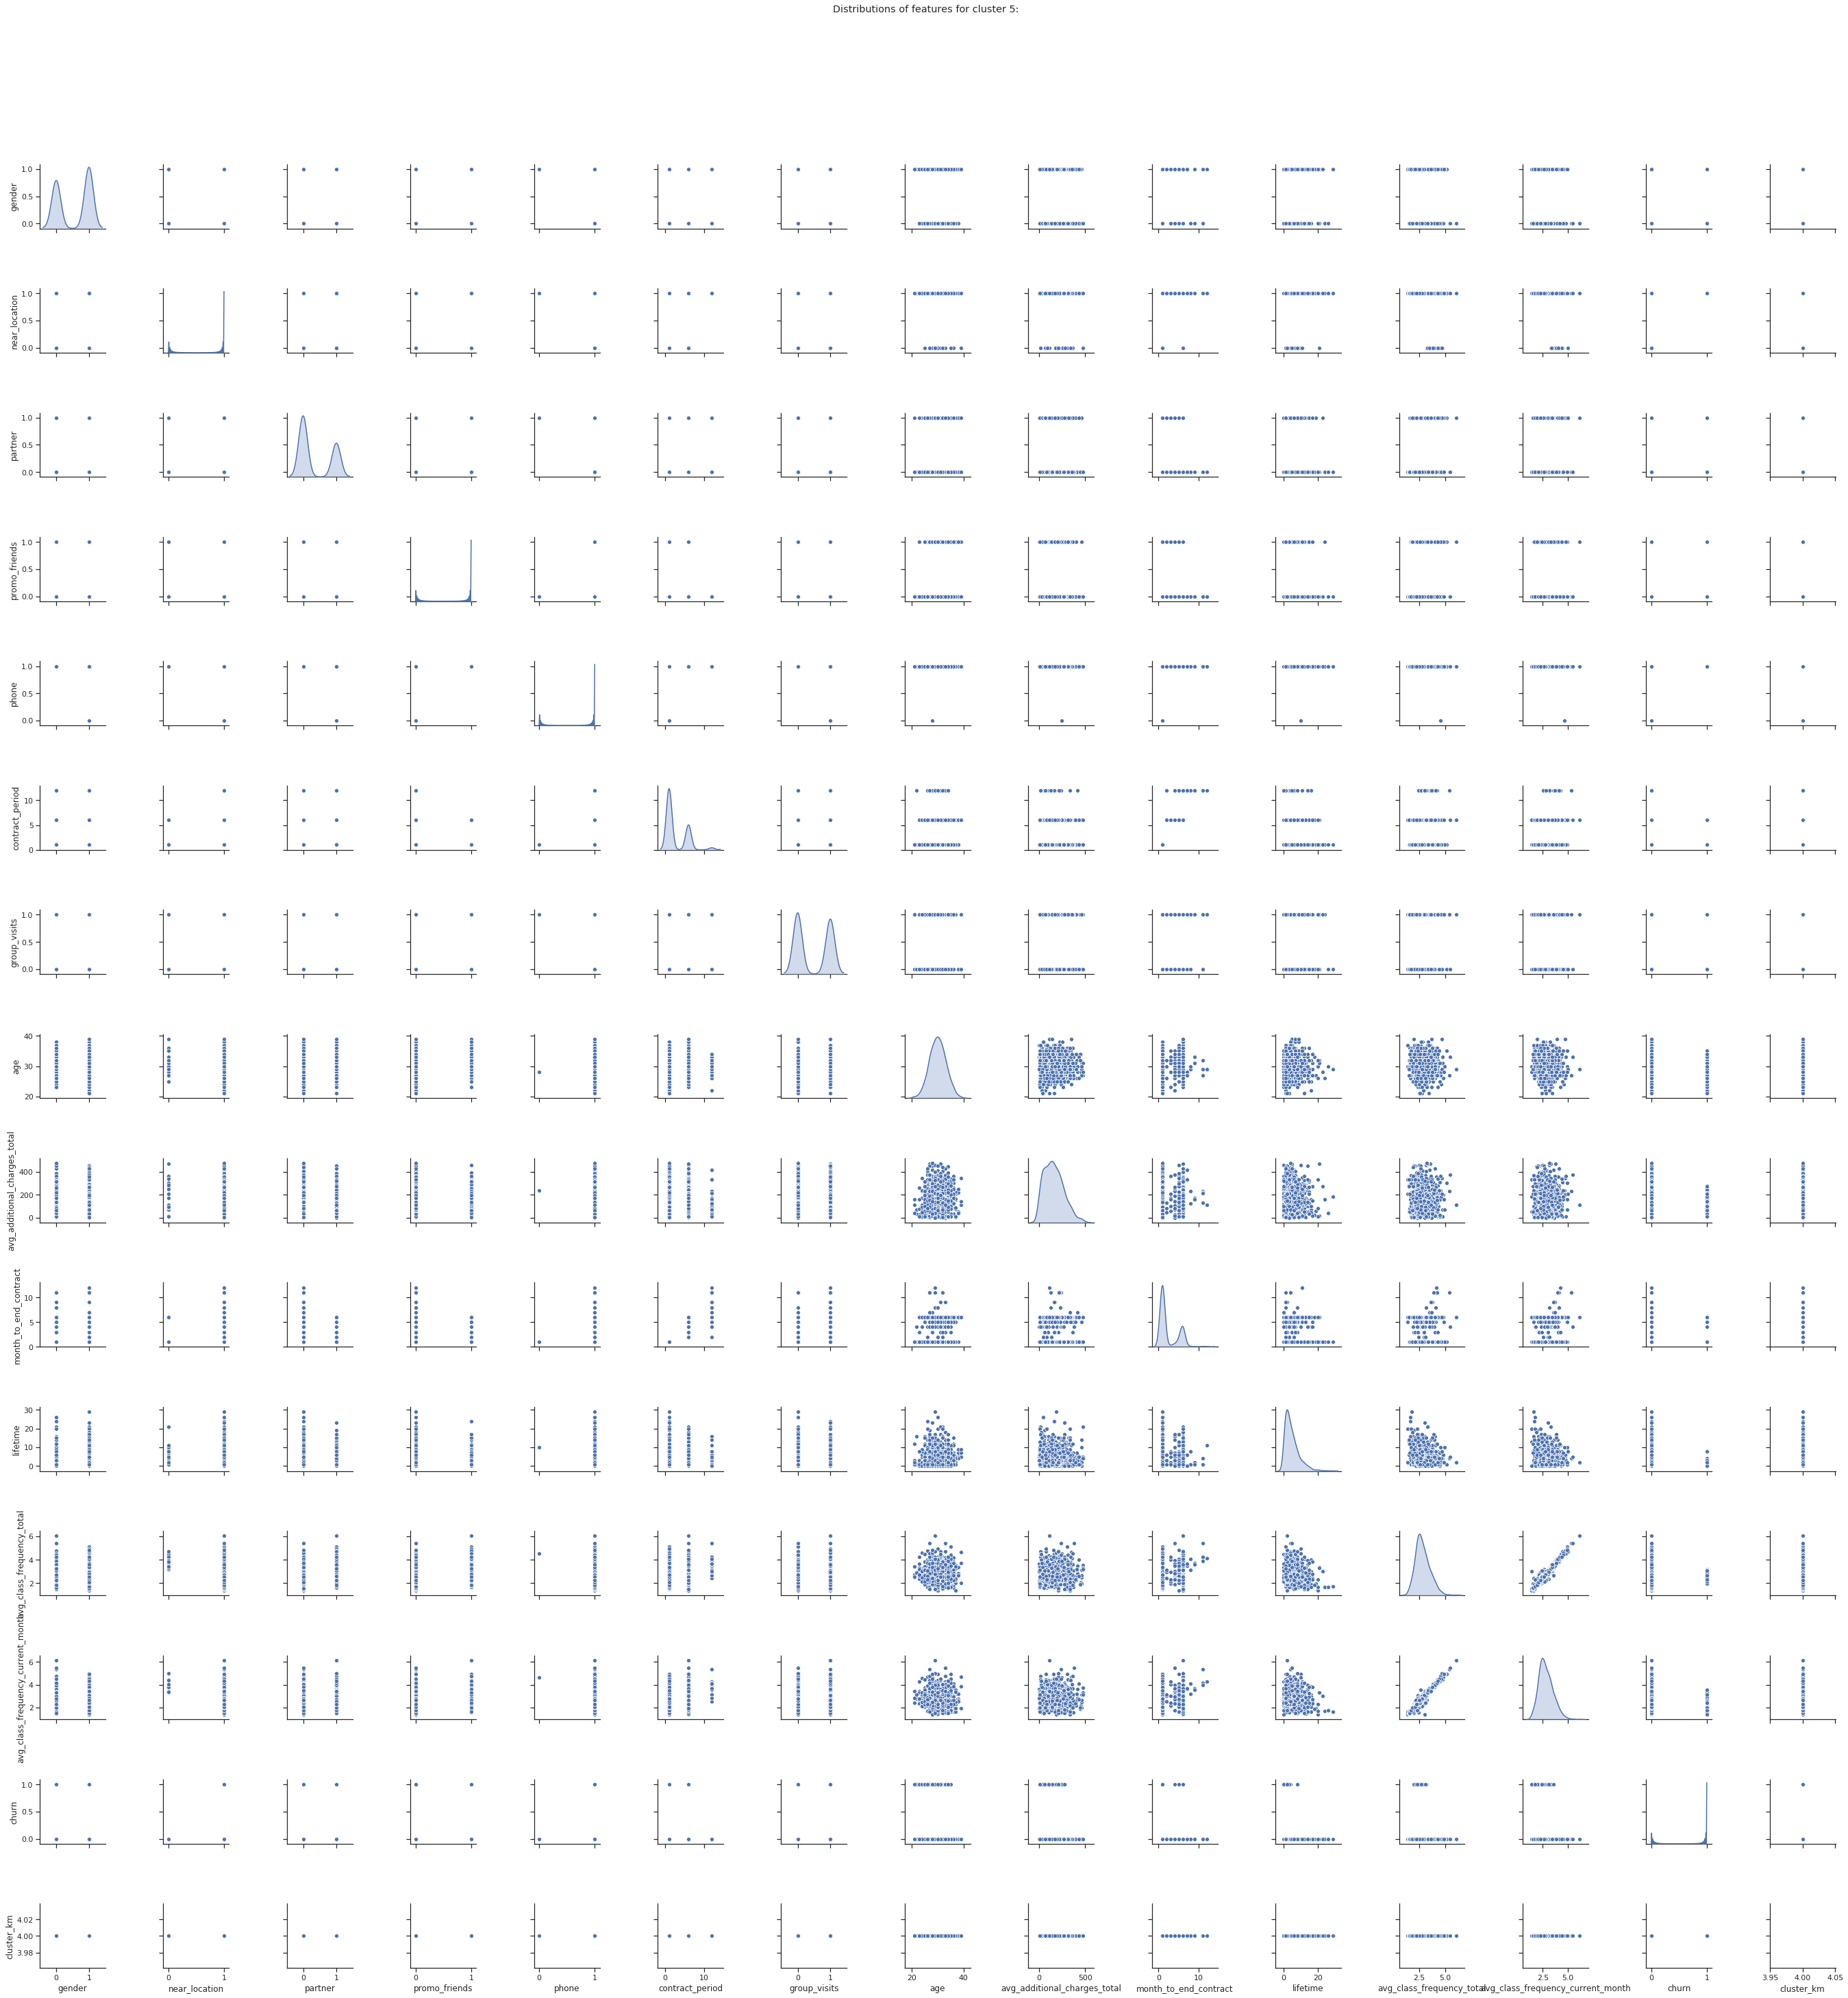

In [21]:
sns.set(style = 'ticks', color_codes = True)

g1 = sns.pairplot(df.query('cluster_km in "4"'), diag_kind = 'kde')  
g1.fig.suptitle("Distributions of features for cluster 5:", y = 1.08)

plt.show(sns)

<font color='green'>**From our mean table and graphs we can see 1(0) cluster group is highest in feaures: partner promo friends, contract period and group visits, high in : location, age, lifetime and frequency of attending. 2(1) cluster shows medium numbers in features: location, promo friends, partner, contract period and lifetime, high in group visits and low in frequency of attending. 3(2) cluster shows lowest numbers in feautures: promo friends contract period and group visits, low in location, lifetime and frequency of attendence. 4(3) cluster showed high in location, but lowest in : partner,  contract period, age, lifetime and frequency of attendence, low in promo friends and group visits. 5(4) cluster is highest in age, lifetime and frequency, but low in partner, promo friends and contract period and medium in group visits**</font>

In [22]:
churn_rate_mean = df.groupby(['cluster_km'])['churn'].mean().reset_index()
churn_rate_mean.sort_values(by = 'churn', ascending = False)

,cluster_km,churn
3,3,0.514263
2,2,0.443564
1,1,0.267532
4,4,0.068100
0,0,0.027695


<font>**GENERAL CONCLUSION**
    
    The cluster 4(3) showed the highest possible churn rate. The group is the lowest in features : partner, contract period, age and frequency of gym attending
    The cluster 1(0) showed the lowest possible churn rate. The group is the highest in features: partner, friends promo, contract period and on second place in age and frequency of gym attedending
    
    RECCOMENDED CUSTOMER STRATEGY
    
 Focus on partner relations, attract more companies for partnership, encourage clients to bring friends with wide variations of bonuses, concentrate on older age group and longer contracts. As we know that clients tend to leave in first month, stimulate and remind them as much as possible on this first stage, focusing on makimg clents frequent systematic gym users</font>